## Analytics

In [9]:
import boto3
import awswrangler as wr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Abrimos un cliente de S3
session = boto3.Session(profile_name='arquitectura',
                        region_name='us-east-1')
s3 = session.client('s3')

In [2]:
# Extraemos los datos económicos de la tabla datos_mensuales a partir del 
# primer momento que se reportó la tasa de interés y tomando solo los datos
# del día primero de cada mes

query = '''
    SELECT * 
    FROM "econ"."datos_mensuales" 
    WHERE tasa_de_interes>0 AND DAY("date")=1
'''


tbl_datos_econ = wr.athena.read_sql_query(query, 
                         database="econ", 
                         ctas_approach=False,
                         boto3_session=session)

In [15]:
# Generamos las tres regresiones de interés

# Regresión tipo_de_cambio ~ tasa_de_interes
linreg_tc_ti = LinearRegression()
linreg_tc_ti.fit(tbl_datos_econ["tasa_de_interes"].to_numpy().reshape(-1, 1), tbl_datos_econ["tipo_de_cambio"].to_numpy())

# Regresión tasa_de_interes ~ inflacion
linreg_ti_inf = LinearRegression()
linreg_ti_inf.fit(tbl_datos_econ["inflacion"].to_numpy().reshape(-1, 1), tbl_datos_econ["tasa_de_interes"].to_numpy())

# Regresión tipo_de_cambio ~ inflacion
linreg_tc_inf = LinearRegression()
linreg_tc_inf.fit(tbl_datos_econ["inflacion"].to_numpy().reshape(-1, 1), tbl_datos_econ["tipo_de_cambio"].to_numpy())

LinearRegression()

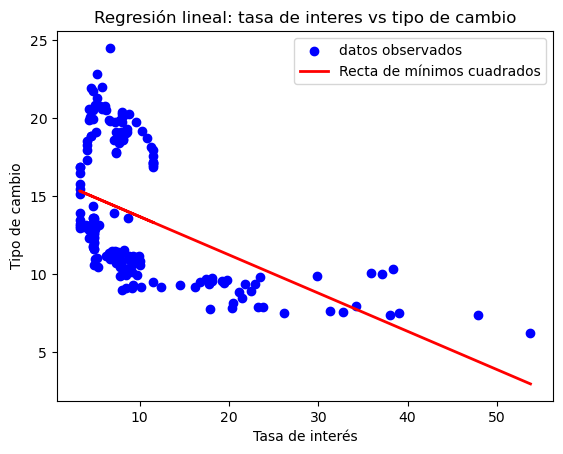

In [12]:
# Gráfica de la regresión linreg_tc_ti
# Graficamos los puntos
plt.scatter(tbl_datos_econ["tasa_de_interes"], tbl_datos_econ["tipo_de_cambio"], color='blue', label='datos observados')
# Graficamos la línea de regresión
plt.plot(tbl_datos_econ["tasa_de_interes"], linreg_tc_ti.predict(tbl_datos_econ["tasa_de_interes"].to_numpy().reshape(-1,1)), color='red', linewidth=2, label='Recta de mínimos cuadrados')
plt.xlabel('Tasa de interés')
plt.ylabel('Tipo de cambio')
plt.title('Regresión lineal: tasa de interes vs tipo de cambio')
plt.legend()
plt.show()

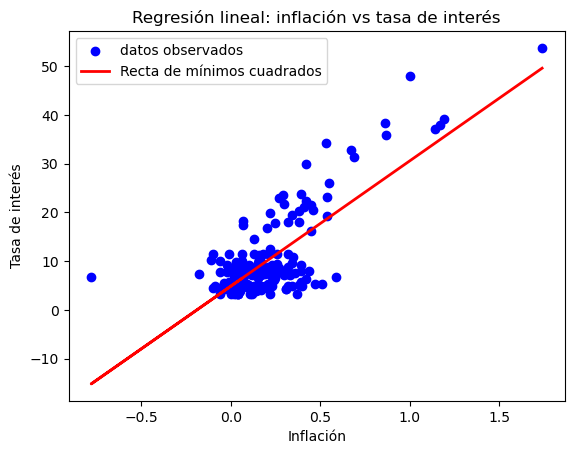

In [16]:
# Gráfica de la regresión linreg_ti_inf
# Graficamos los puntos
plt.scatter(tbl_datos_econ["inflacion"], tbl_datos_econ["tasa_de_interes"], color='blue', label='datos observados')
# Graficamos la línea de regresión
plt.plot(tbl_datos_econ["inflacion"], linreg_ti_inf.predict(tbl_datos_econ["inflacion"].to_numpy().reshape(-1,1)), color='red', linewidth=2, label='Recta de mínimos cuadrados')
plt.xlabel('Inflación')
plt.ylabel('Tasa de interés')
plt.title('Regresión lineal: inflación vs tasa de interés')
plt.legend()
plt.show()

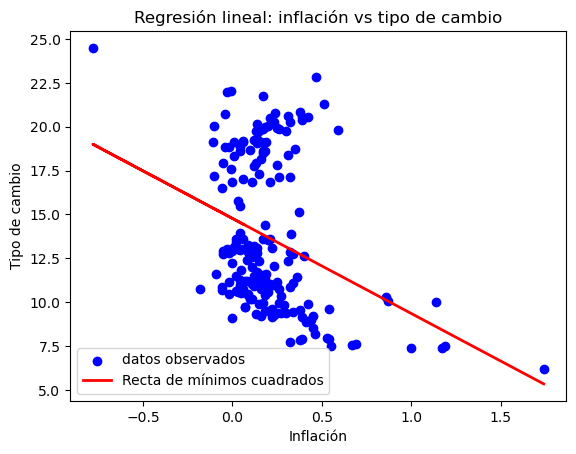

In [17]:
# Gráfica de la regresión linreg_tc_inf
# Graficamos los puntos
plt.scatter(tbl_datos_econ["inflacion"], tbl_datos_econ["tipo_de_cambio"], color='blue', label='datos observados')
# Graficamos la línea de regresión
plt.plot(tbl_datos_econ["inflacion"], linreg_tc_inf.predict(tbl_datos_econ["inflacion"].to_numpy().reshape(-1,1)), color='red', linewidth=2, label='Recta de mínimos cuadrados')
plt.xlabel('Inflación')
plt.ylabel('Tipo de cambio')
plt.title('Regresión lineal: inflación vs tipo de cambio')
plt.legend()
plt.show()